In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = prepare_data('./VIXdata.txt')

/Users/gaoxiancheng/anaconda3/envs/papers/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
def prepare_data(path):
    df = pd.read_csv(path)
    df.columns = ['Date_vix']
    df['Date'] = df['Date_vix'].apply(lambda x: x[0:8])
    df['vix'] = df['Date_vix'].apply(lambda x: x[9:])
    df['vix'] = df['vix'].apply(lambda x: str.replace(x, ' ', ''))
    df['vix'] = df['vix'].apply(lambda x: 0.0 if x == '.' else x)
    df['vix'] = df['vix'].astype(float)
    df['log_vix'] = np.log(df['vix'])
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [7]:
df = df.drop_duplicates()
df.head()

,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.400864
2,20010103 26.60,2001-01-03,26.60,3.280911
4,20010104 26.97,2001-01-04,26.97,3.294725
6,20010105 28.67,2001-01-05,28.67,3.355851
8,20010108 29.84,2001-01-08,29.84,3.395850


In [8]:
df = df[df['vix']>0]
df['log_vix_diff'] = df['log_vix'].diff()
df.dropna(inplace=True)
df.head()

,Date_vix,Date,vix,log_vix,log_vix_diff
2,20010103 26.60,2001-01-03,26.60,3.280911,-0.119953
4,20010104 26.97,2001-01-04,26.97,3.294725,0.013814
6,20010105 28.67,2001-01-05,28.67,3.355851,0.061126
8,20010108 29.84,2001-01-08,29.84,3.395850,0.039998
10,20010109 27.99,2001-01-09,27.99,3.331847,-0.064002


<function matplotlib.pyplot.show(close=None, block=None)>

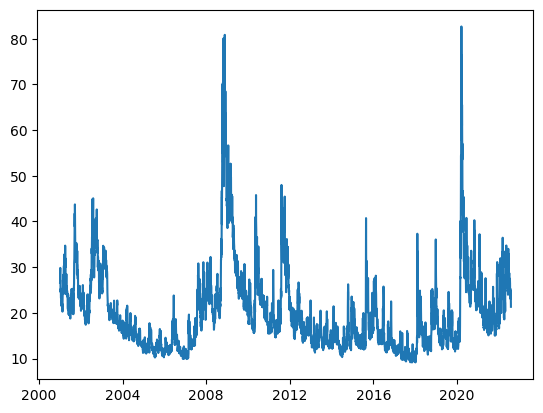

In [9]:
plt.plot(df['Date'],df['vix'])
plt.rcParams['savefig.dpi'] = 800
#plt.savefig('VIX.jpg')
plt.show

In [10]:
df['Date_shift'] = df['Date'].shift(0)

In [11]:
testa=[]
testa=df['log_vix'].shift(2)
testa

2            NaN
4            NaN
6       3.280911
8       3.294725
10      3.355851
          ...   
6185    3.140265
6186    3.136798
6187    3.151025
6188    3.206398
6189    3.145875
Name: log_vix, Length: 5430, dtype: float64

In [12]:
df.head()

,Date_vix,Date,vix,log_vix,log_vix_diff,Date_shift
2,20010103 26.60,2001-01-03,26.60,3.280911,-0.119953,2001-01-03
4,20010104 26.97,2001-01-04,26.97,3.294725,0.013814,2001-01-04
6,20010105 28.67,2001-01-05,28.67,3.355851,0.061126,2001-01-05
8,20010108 29.84,2001-01-08,29.84,3.395850,0.039998,2001-01-08
10,20010109 27.99,2001-01-09,27.99,3.331847,-0.064002,2001-01-09


In [13]:
d={'Date':df['Date'], 'VIX':df['vix'], 'Log VIX':df['log_vix']}

df_1 = pd.DataFrame(data=d)
df_1=df_1.reset_index(drop=True)

In [14]:
df_1.head()

,Date,VIX,Log VIX
0,2001-01-03,26.60,3.280911
1,2001-01-04,26.97,3.294725
2,2001-01-05,28.67,3.355851
3,2001-01-08,29.84,3.395850
4,2001-01-09,27.99,3.331847


In [15]:
df_1.tail()

,Date,VIX,Log VIX
5425,2022-07-25,23.36,3.151025
5426,2022-07-26,24.69,3.206398
5427,2022-07-27,23.24,3.145875
5428,2022-07-28,22.33,3.105931
5429,2022-07-29,21.33,3.060115


In [16]:
df_1['diffsec']=df_1['Log VIX'].diff(2)
df_1['diffsec']=df_1['diffsec'].shift(-2)
df.dropna(inplace=True)
df_1.head()

,Date,VIX,Log VIX,diffsec
0,2001-01-03,26.60,3.280911,0.074940
1,2001-01-04,26.97,3.294725,0.101125
2,2001-01-05,28.67,3.355851,-0.024004
3,2001-01-08,29.84,3.395850,-0.107448
4,2001-01-09,27.99,3.331847,-0.081860


In [17]:
def diff2(val_1,val_2,val_3):
    diff2=np.abs(val_3-val_1)/(np.abs(val_2-val_1)+np.abs(val_3-val_2))
    return diff2

In [18]:
j=7
diff2(df_1.loc[8,'diffsec'],df_1.loc[9,'diffsec'],df_1.loc[10,'diffsec'])

1.0

In [19]:
df_1.loc[9,'Log VIX']

3.2160718975354663

In [20]:
def IRF(val_m, val_k):
    IRF1=[]
    for j in range(0,val_m):
        IRF1.append(diff2(df_1.loc[val_k+j+1,'diffsec'],df_1.loc[val_k+j+2,'diffsec'],df_1.loc[val_k+j+3,'diffsec']))
    IRF=np.sum(IRF1)/val_m
    return IRF

In [21]:
def F(val_m,val_k):
   F=IRF(val_m,val_k)-IRF(val_m,val_k-val_m)
   return F

In [22]:
m=100
Fm=[]
for k in range(100,5300):
    Fm.append(np.abs(F(m,k)))


In [23]:
F(100,500)

-0.02851625355403442

<function matplotlib.pyplot.show(close=None, block=None)>

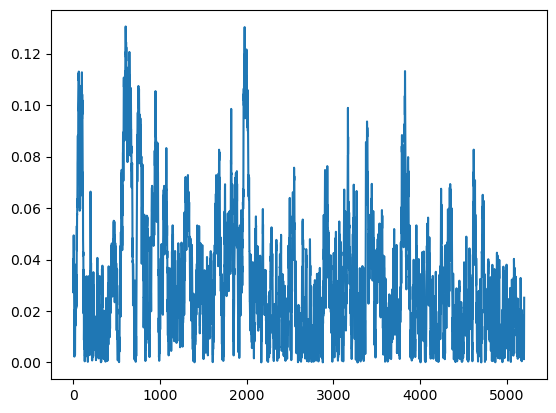

In [24]:
plt.plot(Fm)
plt.rcParams['savefig.dpi'] = 800
#plt.savefig('VIX.jpg')
plt.show

In [25]:
Fm

[0.036533616902954424,
 0.02716945398983206,
 0.04030530823659706,
 0.036808144596529924,
 0.04195899668560166,
 0.049388837375397676,
 0.044468910851762855,
 0.04282703245841668,
 0.03575812860164218,
 0.03418284784111891,
 0.021221133056901875,
 0.021221133056901875,
 0.007473838977705705,
 0.002282732609758198,
 0.011453456734504375,
 0.010498394093750751,
 0.012377754382468353,
 0.0028514524546808806,
 0.011631680803164346,
 0.02072475283614661,
 0.0029654569933273978,
 0.011164389559994548,
 0.011277207527619404,
 0.020228925866120018,
 0.01422839664772424,
 0.018000543426778703,
 0.032011837797015996,
 0.03801129802555114,
 0.03801129802555114,
 0.0306037163577505,
 0.03060371635775061,
 0.01938604892896323,
 0.02708710362460054,
 0.030795969780463284,
 0.021057503522628473,
 0.03415757577971279,
 0.02190800611502408,
 0.025573157023805027,
 0.02355640879830656,
 0.03280752671245413,
 0.05031752041706916,
 0.05303639142994232,
 0.043564216213631934,
 0.05748505685005323,
 0.05748

In [26]:
np.size(Fm)


5200

In [27]:
df_1.insert(loc=4, column='F100',value=0)
df_1.head()

,Date,VIX,Log VIX,diffsec,F100
0,2001-01-03,26.60,3.280911,0.074940,0
1,2001-01-04,26.97,3.294725,0.101125,0
2,2001-01-05,28.67,3.355851,-0.024004,0
3,2001-01-08,29.84,3.395850,-0.107448,0
4,2001-01-09,27.99,3.331847,-0.081860,0


In [28]:
df_1.tail()

,Date,VIX,Log VIX,diffsec,F100
5425,2022-07-25,23.36,3.151025,-0.005150,0
5426,2022-07-26,24.69,3.206398,-0.100467,0
5427,2022-07-27,23.24,3.145875,-0.085760,0
5428,2022-07-28,22.33,3.105931,NaN,0
5429,2022-07-29,21.33,3.060115,NaN,0


In [29]:
df_1.loc[100:5299,'F100']=Fm

In [30]:
print(df_1.iloc[85:120])

          Date    VIX   Log VIX   diffsec      F100
85  2001-05-07  24.86  3.213260 -0.020728  0.000000
86  2001-05-08  24.44  3.196221 -0.018167  0.000000
87  2001-05-09  24.35  3.192532 -0.033831  0.000000
88  2001-05-10  24.00  3.178054  0.010775  0.000000
89  2001-05-11  23.54  3.158701  0.007196  0.000000
90  2001-05-14  24.26  3.188829 -0.102799  0.000000
91  2001-05-15  23.71  3.165897 -0.099240  0.000000
92  2001-05-16  21.89  3.086030 -0.030615  0.000000
93  2001-05-17  21.47  3.066657 -0.033629  0.000000
94  2001-05-18  21.23  3.055415  0.005636  0.000000
95  2001-05-21  20.76  3.033028  0.061644  0.000000
96  2001-05-22  21.35  3.061052 -0.037218  0.000000
97  2001-05-23  22.08  3.094672 -0.069381  0.000000
98  2001-05-24  20.57  3.023834  0.073552  0.000000
99  2001-05-25  20.60  3.025291  0.099714  0.000000
100 2001-05-29  22.14  3.097386  0.022332  0.036534
101 2001-05-30  22.76  3.125005 -0.052774  0.027169
102 2001-05-31  22.64  3.119718 -0.057262  0.040305
103 2001-06-

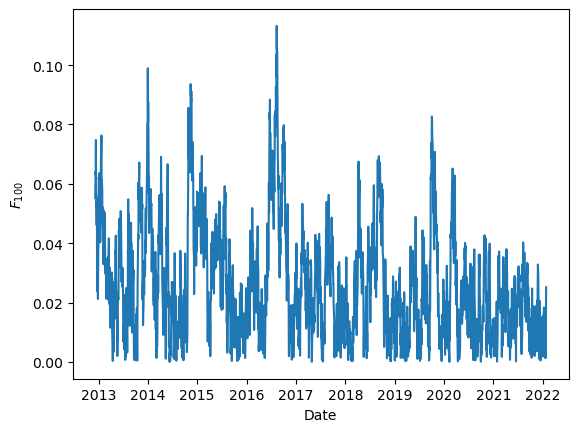

In [32]:
start, end = 3000, 5299

plt.plot(df_1.loc[start:end, 'Date'], df_1.loc[start:end, 'F100'])
plt.xlabel('Date')
plt.ylabel('$F_{100}$')
plt.show() 

In [33]:
top_10_index = df_1['F100'][3000:5299].nlargest(10).index
df_1.loc[top_10_index]

,Date,VIX,Log VIX,diffsec,F100
3925,2016-08-11,11.68,2.457878,0.011069,0.113213
3926,2016-08-12,11.55,2.446685,0.090181,0.105779
3927,2016-08-15,11.81,2.468947,0.031669,0.104308
3923,2016-08-09,11.66,2.456164,0.001714,0.103592
3267,2013-12-31,13.72,2.618855,0.002911,0.098922
3924,2016-08-10,12.05,2.489065,-0.042379,0.096207
3928,2016-08-16,12.64,2.536866,-0.100625,0.094718
3487,2014-11-13,13.79,2.623944,0.014399,0.093634
3921,2016-08-05,11.39,2.432736,0.023428,0.092722
3490,2014-11-18,13.86,2.629007,-0.020409,0.091222


In [34]:
top_10_index = df_1['F100'][4500:5299].nlargest(10).index
df_1.loc[top_10_index]

,Date,VIX,Log VIX,diffsec,F100
4716,2019-10-03,19.12,2.950735,-0.068171,0.082695
4717,2019-10-04,17.04,2.835564,0.174072,0.082695
4718,2019-10-07,17.86,2.882564,0.042746,0.074290
4719,2019-10-08,20.28,3.009635,-0.143442,0.074290
4714,2019-10-01,18.56,2.921009,0.029726,0.073881
4720,2019-10-09,18.64,2.925310,-0.179322,0.073491
4732,2019-10-25,12.65,2.537657,0.042560,0.070796
4721,2019-10-10,17.57,2.866193,-0.187228,0.069736
4715,2019-10-02,20.56,3.023347,-0.187784,0.068633
4722,2019-10-11,15.58,2.745988,-0.140340,0.065441


In [35]:
df_1.iloc[[4500]]

,Date,VIX,Log VIX,diffsec,F100
4500,2018-11-21,20.8,3.034953,-0.095791,0.002827


In [38]:
top_10_index = df_1['F100'][3270:4500].nlargest(10).index #2014-2018
df_1.loc[top_10_index]

,Date,VIX,Log VIX,diffsec,F100
3925,2016-08-11,11.68,2.457878,0.011069,0.113213
3926,2016-08-12,11.55,2.446685,0.090181,0.105779
3927,2016-08-15,11.81,2.468947,0.031669,0.104308
3923,2016-08-09,11.66,2.456164,0.001714,0.103592
3924,2016-08-10,12.05,2.489065,-0.042379,0.096207
3928,2016-08-16,12.64,2.536866,-0.100625,0.094718
3487,2014-11-13,13.79,2.623944,0.014399,0.093634
3921,2016-08-05,11.39,2.432736,0.023428,0.092722
3490,2014-11-18,13.86,2.629007,-0.020409,0.091222
3488,2014-11-14,13.31,2.588516,0.040491,0.090358


In [37]:
df_1.iloc[[3268]]

,Date,VIX,Log VIX,diffsec,F100
3268,2014-01-02,14.23,2.655352,-0.048966,0.080898


In [139]:
df_1.iloc[[2262]]

,Date,VIX,Log VIX,diffsec,F100
2262,2010-01-04,20.04,2.99773,-0.044906,0.014076


In [156]:
df_1.iloc[[5000]]

,Date,VIX,Log VIX,diffsec,F100
5000,2020-11-17,22.71,3.122805,0.01746,0.008326


# 2018-2022: 2022.10

In [157]:
top_10_index = df_1['F100'][4200:5000].nlargest(10).index
df_1.loc[top_10_index]

,Date,VIX,Log VIX,diffsec,F100
4716,2019-10-03,19.12,2.950735,-0.068171,0.082695
4717,2019-10-04,17.04,2.835564,0.174072,0.082695
4718,2019-10-07,17.86,2.882564,0.042746,0.074290
4719,2019-10-08,20.28,3.009635,-0.143442,0.074290
4714,2019-10-01,18.56,2.921009,0.029726,0.073881
4720,2019-10-09,18.64,2.925310,-0.179322,0.073491
4732,2019-10-25,12.65,2.537657,0.042560,0.070796
4721,2019-10-10,17.57,2.866193,-0.187228,0.069736
4446,2018-09-06,14.65,2.684440,-0.034019,0.069329
4715,2019-10-02,20.56,3.023347,-0.187784,0.068633


In [159]:
top_10_index = df_1['F100'][2260:3268].nlargest(10).index
df_1.loc[top_10_index]

,Date,VIX,Log VIX,diffsec,F100
3267,2013-12-31,13.72,2.618855,0.002911,0.098922
3265,2013-12-27,12.46,2.522524,0.096331,0.080307
3266,2013-12-30,13.56,2.607124,0.048228,0.080307
3029,2013-01-22,12.43,2.520113,0.020701,0.076295
2646,2011-07-13,19.91,2.991222,-0.019270,0.075680
3003,2012-12-12,15.95,2.769459,0.063755,0.074781
2648,2011-07-15,19.53,2.971952,-0.016521,0.072354
2647,2011-07-14,20.80,3.034953,0.007186,0.070763
3030,2013-01-23,12.46,2.522524,0.033928,0.070225
3224,2013-10-29,13.41,2.596001,0.025038,0.067180
